## Knn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_training = pd.read_csv("../data_mod/train_motion_data.csv")
df_test = pd.read_csv("../data_mod/test_motion_data.csv")

df_training

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631
...,...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,1.687505,0.450360,0.384845,-1.236468,SLOW,3583789
3640,-1.934203,0.914925,-0.096013,0.321468,0.649350,-0.477162,SLOW,3583790
3641,-0.222845,0.747304,-0.887430,0.361174,-0.406836,0.054291,SLOW,3583790
3642,-0.349423,0.067261,0.394368,-0.132405,0.020159,-0.004963,SLOW,3583791


In [3]:
df_training.isna().sum()

AccX         0
AccY         0
AccZ         0
GyroX        0
GyroY        0
GyroZ        0
Class        0
Timestamp    0
dtype: int64

### Change categories to numbers

In [4]:
df_training = df_training.replace(
    {"Class": {"NORMAL": 0, "AGGRESSIVE": 1, "SLOW": 2}})
df_test = df_test.replace(
    {"Class": {"NORMAL": 0, "AGGRESSIVE": 1, "SLOW": 2}})
df_training

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,0,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,0,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,0,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,0,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,0,3581631
...,...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,1.687505,0.450360,0.384845,-1.236468,2,3583789
3640,-1.934203,0.914925,-0.096013,0.321468,0.649350,-0.477162,2,3583790
3641,-0.222845,0.747304,-0.887430,0.361174,-0.406836,0.054291,2,3583790
3642,-0.349423,0.067261,0.394368,-0.132405,0.020159,-0.004963,2,3583791


### Normalize the data

In [5]:
X_train = df_training.drop(columns=["Class"])
X_train = (X_train - X_train.mean()) / X_train.std() * 100

X_train["Class"] = df_training["Class"]
X_train

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp,Class
0,-4.105593,8.126800,-0.839683,86.395537,-137.422924,81.244480,-167.836693,0
1,-168.957027,-111.696347,-21.567602,-45.056304,41.666937,110.286351,-167.680966,0
2,-64.437130,-5.422989,21.544914,-31.363404,-22.224581,69.099704,-167.680966,0
3,70.817107,-17.161393,66.946204,101.914155,-22.708606,40.585870,-167.525239,0
4,6.216602,94.197287,-7.613837,43.491116,-1.895461,40.585870,-167.525239,0
...,...,...,...,...,...,...,...,...
3639,88.795978,-215.193071,170.470015,670.625933,305.945487,-1075.677828,168.534389,2
3640,-200.341232,109.401604,-10.586600,478.012498,515.529027,-419.331681,168.690117,2
3641,-26.714411,90.847295,-90.928501,537.348381,-321.353042,40.057837,168.690117,2
3642,-39.556507,15.572024,39.195173,-200.242502,16.981578,-11.161455,168.845844,2


In [6]:
X_testing = df_test.drop(columns="Class")
X_testing = (X_testing - X_testing.mean()) / X_testing.std() * 100

X_testing["Class"] = df_test["Class"]
X_testing

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp,Class
0,67.345100,-9.509000,41.323414,-4.790480,-1.200297,-10.104756,-172.702195,1
1,57.982946,10.303100,18.684875,-86.378447,-7.575925,188.298737,-172.511994,1
2,270.452050,-824.010358,235.150005,30.961551,10.099084,-43.597957,-172.511994,1
3,229.805029,-828.171460,248.992641,80.464367,-150.491000,-55.972952,-172.321794,1
4,283.133326,-732.402479,218.481818,-52.459850,-30.300937,20.967248,-172.321794,1
...,...,...,...,...,...,...,...,...
3079,-84.712435,-57.627689,-20.952320,-226.636402,-1083.731469,445.483427,166.615653,2
3080,145.444037,51.068429,97.802585,1978.072279,1410.464858,-604.239195,166.805853,2
3081,121.268079,-177.287100,-238.336576,870.675908,569.639371,-422.380477,166.805853,2
3082,83.265000,79.069807,-101.303823,349.062949,422.684284,347.559582,166.996054,2


### Balance data

Class 0: 1113
Class 1: 1113
Proportion: 1.0 : 1


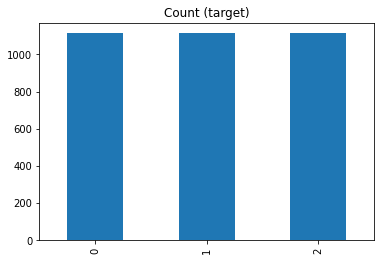

In [7]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_rus, y_rus = rus.fit_resample(X_train.drop(columns="Class"), X_train["Class"])

target_count = y_rus.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

## Train model

In [8]:
X_training  = X_rus
y_training  = y_rus

X_test = X_testing.drop(columns="Class")
y_test = X_testing.Class

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [10]:
Kneigh = KNeighborsClassifier(weights="uniform")

param_grid = {'n_neighbors': np.arange(1, 200), 'leaf_size': np.arange(20, 40)}

knn_gscv = GridSearchCV(Kneigh, param_grid, cv=5, verbose=10, n_jobs=10)
knn_gscv.fit(X_training, y_training)

Fitting 5 folds for each of 3980 candidates, totalling 19900 fits
[CV 1/5; 1/3980] START leaf_size=20, n_neighbors=1..............................
[CV 1/5; 2/3980] START leaf_size=20, n_neighbors=2..............................
[CV 5/5; 1/3980] START leaf_size=20, n_neighbors=1..............................
[CV 2/5; 1/3980] START leaf_size=20, n_neighbors=1..............................
[CV 1/5; 1/3980] END leaf_size=20, n_neighbors=1;, score=0.846 total time=   0.0s
[CV 3/5; 1/3980] START leaf_size=20, n_neighbors=1..............................
[CV 5/5; 1/3980] END leaf_size=20, n_neighbors=1;, score=0.831 total time=   0.0s
[CV 1/5; 2/3980] END leaf_size=20, n_neighbors=2;, score=0.787 total time=   0.0s
[CV 2/5; 1/3980] END leaf_size=20, n_neighbors=1;, score=0.898 total time=   0.0s
[CV 4/5; 2/3980] START leaf_size=20, n_neighbors=2..............................
[CV 5/5; 2/3980] START leaf_size=20, n_neighbors=2..............................
[CV 3/5; 2/3980] START leaf_size=20, n_

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=10,
             param_grid={'leaf_size': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39]),
                         'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  6...
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
       196, 197, 198, 199])},
             verbose=10)

In [11]:
best_params = knn_gscv.best_params_
best_params

{'leaf_size': 20, 'n_neighbors': 96}

In [12]:
knn_gscv.best_score_

0.9523682769393746

In [13]:
knn_gscv.score(X_training, y_training)

0.958670260557053

In [14]:
knn_gscv.score(X_test, y_test)

0.48184176394293127

In [15]:
classes = ["NORMAL", "AGGRESIVE", "SLOW"]

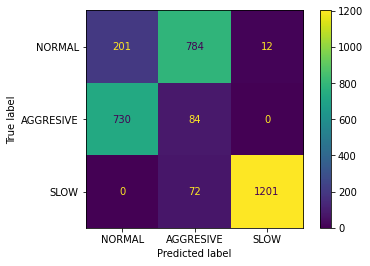

In [16]:
y_pred = knn_gscv.predict(X_test)

CM = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=CM,
                       display_labels=classes)
display.plot()

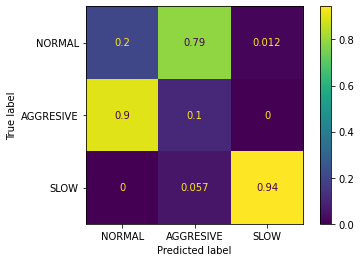

In [17]:
CM_norm = confusion_matrix(y_test, y_pred, normalize="true")
display = ConfusionMatrixDisplay(confusion_matrix=CM_norm,
                       display_labels=classes)
display.plot()

In [18]:
from sklearn.ensemble import BaggingClassifier

knn_bagging = BaggingClassifier(knn_gscv.best_estimator_, max_samples=0.5, max_features=0.5, random_state=0)
knn_bagging.fit(X_training, y_training)

BaggingClassifier(base_estimator=KNeighborsClassifier(leaf_size=20,
                                                      n_neighbors=96),
                  max_features=0.5, max_samples=0.5, random_state=0)

In [19]:
knn_bagging.score(X_training, y_training)

0.9841269841269841

In [20]:
knn_bagging.score(X_test, y_test)

0.4464980544747082

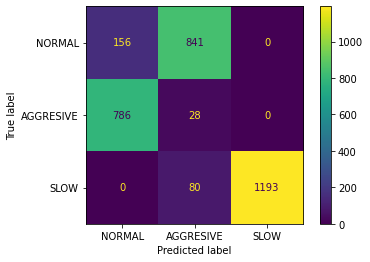

In [21]:
y_pred = knn_bagging.predict(X_test)

CM = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=CM,
                       display_labels=classes)
display.plot()

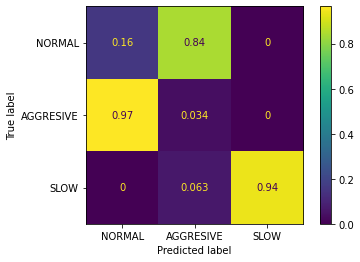

In [22]:
CM_norm = confusion_matrix(y_test, y_pred, normalize="true")
display = ConfusionMatrixDisplay(confusion_matrix=CM_norm,
                       display_labels=classes)
display.plot()

In [23]:
def evaluate(model, test_features, test_labels):
    accuracy = model.score(test_features, test_labels)
    print('Model Performance')
    print('Accuracy = {:0.3f}%.'.format(accuracy))
    
    return accuracy

bagging_accuracy = evaluate(knn_bagging, X_test, y_test)

best_random = knn_gscv.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print(f'Improvement of {100 * (bagging_accuracy - random_accuracy) / random_accuracy:.3f}%.')

Model Performance
Accuracy = 0.446%.
Model Performance
Accuracy = 0.482%.
Improvement of -7.335%.
